# Calculation of solar axial dipole moment using SDO/HMI synoptic charts

### Step I: Importing necessary python modules

In [19]:
import os
import numpy as np
import pandas as pd
import csv
import glob as g


import astropy.units as u
import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a
from mpl_toolkits.basemap import Basemap

from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.style
params = {'legend.fontsize': 16,
          'axes.labelsize': 16,
          'axes.titlesize': 16,
          'xtick.labelsize' :14,
          'ytick.labelsize': 14,
          'grid.color': 'k',
          'grid.linestyle': ':',
          'grid.linewidth': 0.5,
          'mathtext.fontset' : 'stix',
          'mathtext.rm'      : 'DejaVu serif',
          'font.family'      : 'DejaVu serif',
          'font.serif'       : "Times New Roman", # or "Times"          
         }
matplotlib.rcParams.update(params)

from tqdm.auto import trange
from time import sleep

### Step II: Specifying the working directories

In [87]:
cwd = os.getcwd()

try: 
    os.mkdir(cwd+'/HMI_Synoptic/') 
except OSError as error: 
    print(error)  

data_dir = cwd+'/HMI_Synoptic/'

### Step III: Searching for the data series on JSOC and downloading the data files

This step requires your email id to be registered at http://jsoc.stanford.edu/ajax/register_email.html After this step, one can directly jump to step V

In [55]:
time = a.Time('2010/01/01', '2025/01/01')

# HMI synoptic chart of radial (Mr) with polar field correction
series = a.jsoc.Series('hmi.synoptic_mr_polfil_720s') 

#replace the string "your_registered_email_id" with your registered email id
result = Fido.search(time, series, a.jsoc.Notify("your_registered_email_id"))
print(result)

# downloading the files using Fido
files = Fido.fetch(result, path=data_dir)

Results from 1 Provider:

176 Results from the JSOCClient:
Source: http://jsoc.stanford.edu

TELESCOP  INSTRUME WAVELNTH CAR_ROT
-------- --------- -------- -------
 SDO/HMI HMI_SIDE1   6173.0    2097
 SDO/HMI HMI_SIDE1   6173.0    2098
 SDO/HMI HMI_SIDE1   6173.0    2099
 SDO/HMI HMI_SIDE1   6173.0    2100
 SDO/HMI HMI_SIDE1   6173.0    2101
 SDO/HMI HMI_SIDE1   6173.0    2102
 SDO/HMI HMI_SIDE1   6173.0    2103
     ...       ...      ...     ...
 SDO/HMI HMI_SIDE1   6173.0    2266
 SDO/HMI HMI_SIDE1   6173.0    2267
 SDO/HMI HMI_SIDE1   6173.0    2268
 SDO/HMI HMI_SIDE1   6173.0    2269
 SDO/HMI HMI_SIDE1   6173.0    2270
 SDO/HMI HMI_SIDE1   6173.0    2271
 SDO/HMI HMI_SIDE1   6173.0    2272
Length = 176 rows


Export request pending. [id=JSOC_20230723_1087_X_IN, status=2]
Waiting for 0 seconds...
352 URLs found for download. Full request totalling 6964MB


Files Downloaded:   0%|          | 0/352 [00:00<?, ?file/s]

hmi.synoptic_ml_720s.2097.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2097.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2098.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2098.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2099.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2099.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2100.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2100.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2101.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2101.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2102.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2102.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2103.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2103.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2104.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2104.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2105.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2105.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2106.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2106.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2107.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2107.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2108.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2108.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2109.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2109.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2110.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2110.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2111.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2111.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2112.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2112.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2113.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2113.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2114.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2114.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2115.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2115.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2116.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2116.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2117.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2117.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2118.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2118.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2119.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2119.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2120.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2120.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2121.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2121.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2122.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2122.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2123.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2123.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2124.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2124.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2125.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2125.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2126.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2126.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2127.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2127.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2128.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2128.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2129.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2129.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2130.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2130.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2131.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2131.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2132.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2132.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2133.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2133.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2134.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2134.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2135.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2135.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2136.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2136.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2137.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2137.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2138.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2138.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2139.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2139.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2140.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2140.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2141.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2141.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2142.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2142.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2143.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2143.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2144.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2144.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2145.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2145.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2146.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2146.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2147.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2147.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2148.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2148.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2149.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2149.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2150.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2150.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2151.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2151.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2152.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2152.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2153.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2153.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2154.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2154.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2155.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2155.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2156.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2156.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2157.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2157.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2158.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2158.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2159.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2159.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2160.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2160.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2161.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2161.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2162.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2162.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2163.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2163.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2164.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2164.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2165.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2165.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2166.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2166.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2167.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2167.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2168.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2168.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2169.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2169.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2170.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2170.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2171.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2171.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2172.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2172.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2173.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2173.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2174.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2174.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2175.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2175.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2176.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2176.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2177.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2177.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2178.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2178.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2179.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2179.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2180.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2180.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2181.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2181.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2182.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2182.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2183.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2183.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2184.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2184.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2185.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2185.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2186.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2186.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2187.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2187.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2188.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2188.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2189.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2189.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2190.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2190.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2191.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2191.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2192.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2192.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2193.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2193.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2194.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2194.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2195.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2195.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2196.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2196.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2197.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2197.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2198.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2198.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2199.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2199.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2200.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2200.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2201.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2201.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2202.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2202.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2203.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2203.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2204.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2204.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2205.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2205.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2206.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2206.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2207.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2207.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2208.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2208.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2209.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2209.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2210.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2210.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2211.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2211.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2212.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2212.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2213.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2213.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2214.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2214.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2215.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2215.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2216.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2216.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2217.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2217.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2218.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2218.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2219.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2219.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2220.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2220.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2221.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2221.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2222.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2222.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2223.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2223.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2224.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2224.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2225.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2225.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2226.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2226.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2227.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2227.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2228.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2228.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2229.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2229.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2230.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2230.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2231.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2231.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2232.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2232.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2233.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2233.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2234.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2234.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2235.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2235.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2236.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2236.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2237.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2237.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2238.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2238.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2239.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2239.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2240.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2240.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2241.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2241.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2242.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2242.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2243.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2243.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2244.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2244.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2245.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2245.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2246.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2246.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2247.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2247.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2248.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2248.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2249.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2249.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2250.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2250.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2251.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2251.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2252.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2252.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2253.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2253.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2254.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2254.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2255.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2255.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2256.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2256.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2257.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2257.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2258.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2258.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2259.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2259.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2260.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2260.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2261.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2261.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2262.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2262.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2263.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2263.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2264.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2264.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2265.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2265.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2266.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2266.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2267.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2267.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2268.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2268.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2269.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2269.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2270.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2270.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2271.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2271.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2272.synopMl.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

hmi.synoptic_ml_720s.2272.epts.fits:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

In [90]:
# sorting the datafiles chronologically
files=sorted(g.glob(data_dir+'*.fits'))
# and taking a look at the header info of any one of the files. In this case, the 174th one.
sunpy.map.Map(files[174]).fits_header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / data type of original image                    
NAXIS   =                    2 / dimension of original image                    
NAXIS1  =                 3600 / length of original image axis                  
NAXIS2  =                 1440 / length of original image axis                  
BLANK   =          -2147483648                                                  
BZERO   =                  0.0                                                  
BSCALE  =                  0.1                                                  
CHECKSUM= 'jdcQkdZOjdbOjdZO'   / HDU checksum updated 2023-06-22T09:53:03       
DATASUM = '1608641386'         / data unit checksum updated 2023-06-20T07:28:46 
N_EXTRAP=                    1 / Extrapolation in north                         
S_EXTRAP=                    1 / Extrapolation in south                         
METHOD  = 'TEMP_SPAT'       

### Step IV (a): Visualizing a synoptic chart on a 1400x3600 meshgrid

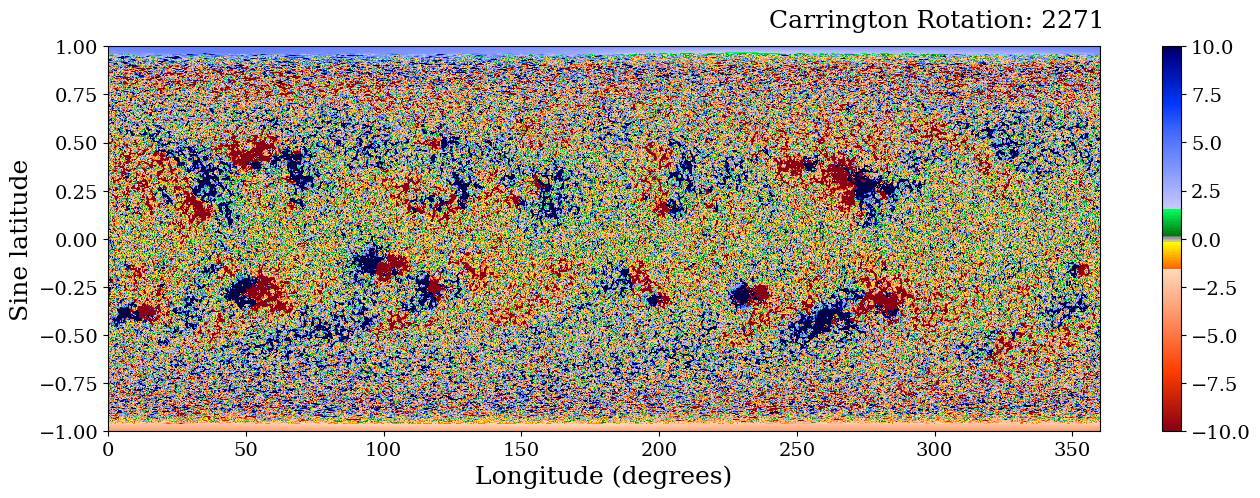

In [147]:
hmi_map = sunpy.map.Map(files[174])
car_rot = hmi_map.fits_header.get('CAR_ROT')
nth = hmi_map.fits_header.get('NAXIS2')
nph = hmi_map.fits_header.get('NAXIS1')
th = np.linspace(-1, 1, nth)
ph = np.linspace(0, 360, nph)
phi,theta = np.meshgrid(ph,th)

fig, ax = plt.subplots(figsize=(16,5))
plt.pcolormesh(phi,theta,hmi_map.data, cmap='hmimag', vmin=-10, vmax = 10)
plt.colorbar()
plt.xlabel('Longitude (degrees)', fontsize=18)
plt.ylabel('Sine latitude', fontsize=18)
plt.text(240, 1.1, f'Carrington Rotation: {car_rot:4.0f}', fontsize = 18)

plt.savefig('CRmap.png',format='png', dpi=300, bbox_inches='tight',pad_inches = 0.2)
plt.show()

### Step IV (b): Mapping the synoptic chart onto a sphere

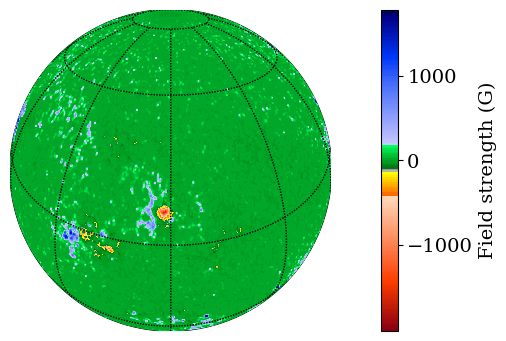

In [146]:
plt.figure(figsize=(5,5))

map_ = Basemap(projection='nsper',satellite_height=5000000, lat_0=45,lon_0=120,resolution='i')
map_.drawmapboundary(linewidth=1)

# draw lat/lon grid lines every 30 degrees.
map_.drawmeridians(np.arange(0,360,30), linestyle='--')
map_.drawparallels(np.arange(-90,90,30))

# setting up the spherical surface
nlats = 1440
nlons = 3600
delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])


# compute native map projection coordinates of lat/lon grid.
x, y = map_(lons*180./np.pi, lats*180./np.pi)

# contour data over the map.
cs = map_.contourf(x,y,hmi_map.data,250, cmap='hmimag')  
cbar = map_.colorbar(location = 'right', pad = 0.5)
cbar.ax.tick_params(labelsize = 14)
cbar.set_label('Field strength (G)', fontsize=14)
cbar.set_ticks([-1000,0,1000])

plt.savefig('mgram.png',format='png', dpi=300, bbox_inches='tight',pad_inches = 0.2)
plt.show()

### Step V(a): Taking azimuthal average of the magnetic field and performing a weighted integration

For a given synoptic chart corresponding to a particular Carrington Rotation number associated with time $t$, global axial dipole moment of the Sun, $D$, at that instant can be formulated as (Ref. [Petrovay, 2020](https://link.springer.com/article/10.1007/s41116-020-0022-z)),

\begin{equation}\label{eq:q1}
    D(t) = \frac{3}{2} \int^{\pi}_{0} \overline{B_r}(\theta, t) \cos{\theta} \sin{\theta}\ d\theta,
\end{equation}

Under the linear mapping, $\lambda = \dfrac{\pi}{2} - \theta$, the above equation modifies to,
\begin{equation}
    D(t) = \frac{3}{2} \int^{-\pi/2}_{\pi/2} \overline{B_r}(\lambda, t) \sin{\lambda} \cos{\lambda}\ (-d\lambda) \ = \frac{3}{2} \int^{\pi/2}_{-\pi/2} \overline{B_r}(\lambda, t) \sin{\lambda} \cos{\lambda}\ d\lambda
\end{equation}

where, $\overline{B_r}$ represents azimuthally averaged radial magnetic field of the Sun at colatitude $\theta$ i.e., latitude $\lambda$.


####
####


**Note:**

The Line-of-Sight (LOS) magnetic field, $\tilde B_{los}$, can be defined as,

\begin{equation}
    \tilde B_{los} = \overline{B_r}(\theta, t) \sin{\theta}  = \overline{B_r}(\lambda, t) \cos{\lambda}
\end{equation}


Hence, the working equation modifies to,

\begin{equation}
    D(t) = \frac{3}{2} \int^{\pi/2}_{-\pi/2} \tilde B_{los}(\lambda, t) \sin{\lambda}\ d\lambda,
\end{equation}

In [118]:
def simpsons_(B):
    ll = np.deg2rad(-90)
    ul = np.deg2rad(90)
    n = 1440
    h = ( ul - ll )/(n-1)
    th = np.linspace(ll, ul, n)
        
    DM = 0
    i = 0
    while i<= n-1:
        if i == 0 or i == n-1:
            DM+= B[i]*(np.sin(th[i]))#*(np.cos(th[i]))
        elif i % 2 != 0:
            DM+= 4 * B[i]*(np.sin(th[i]))#*(np.cos(th[i]))
        else:
            DM+= 2 * B[i]*(np.sin(th[i]))#*(np.cos(th[i]))
        i+= 1
    DM = 1.5*DM * (h / 3)
    return DM


car_rot_start = sunpy.map.Map(files[0]).fits_header.get('CAR_ROT')
car_rot_end = sunpy.map.Map(files[-1]).fits_header.get('CAR_ROT')+1
time = np.arange(car_rot_start,car_rot_end,1)
DM = np.zeros(len(time))  #DM means Dipole Moment
phiaverage = []


for i in trange(0, len(time), desc='Calculation in progress'):
    hmi_map = sunpy.map.Map(files[i])
    phiavg = np.mean(hmi_map.data, axis=1)
    phiaverage.append(phiavg)
    DM[i] += simpsons_(phiavg)

Calculation in progress:   0%|          | 0/175 [00:00<?, ?it/s]

### Step V(b): Smoothing and visualizing the solar axial dipole moment time series

In [119]:
DM_smooth = pd.Series(DM).rolling(13, center=True).mean() #13-rotations smoothing

In [149]:
# In this and the following snippet we associate the Gregorian calender year corresponding to each CR No. 
# Ref: https://www.astroleague.org/files/obsclubs/Carrington%20Rotation%20Start%20Dates.pdf
df = pd.read_csv("CR_YEAR_Conversion.csv")
df

,Rotation,Year,Month,Day,Date,Julian Date
0,-10,1853,1,13.99160,1853.03559,2.397867e+06
1,-9,1853,2,11.04170,1853.11244,2.397867e+06
2,-8,1853,3,9.66420,1853.18538,2.397922e+06
3,-7,1853,4,5.96200,1853.26017,2.397949e+06
4,-6,1853,5,4.04170,1853.33710,2.397949e+06
...,...,...,...,...,...,...
2306,2296,2025,3,29.81486,2025.24111,2.460764e+06
2307,2297,2025,4,26.08529,2025.31577,2.460792e+06
2308,2298,2025,5,23.31315,2025.39032,2.460819e+06
2309,2299,2025,6,19.51419,2025.46479,2.460846e+06


In [150]:
cr = np.array(df['Rotation '])
date = np.array(df['Date '])

i = np.where(cr==car_rot_start)[0][0]
j = np.where(cr==car_rot_end)[0][0]
rot2date = date[i:j]

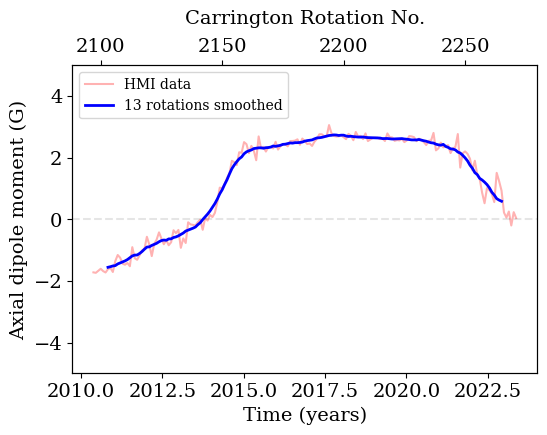

In [151]:
fig, ax = plt.subplots(figsize=(6,4))

plt.plot(rot2date, DM, c='r', alpha=0.3, label='HMI data')
plt.plot(rot2date, DM_smooth, c='b', lw=2.0, label='13 rotations smoothed')
plt.axhline(y=0, alpha = 0.1, linestyle="--", c='k')

plt.xlabel('Time (years)', fontsize=14)
plt.ylabel('Axial dipole moment (G)', fontsize=14)
plt.ylim(-5,5)

plt.legend(loc='upper left', fontsize=10)

ax2 = ax.twiny()
plt.plot(time, (DM), c='k', alpha=0.0, label='HMI data')
plt.xlabel('Carrington Rotation No.', fontsize=14, labelpad=10)


plt.savefig('dipole.png',format='png', dpi=300, bbox_inches='tight',pad_inches = 0.2)
plt.show()

### Step V(c): Writing them down in a data file

In [142]:
with open(cwd+'/HMI_Dipole_Moment.dat', 'w') as f:
    writer = csv.writer(f, delimiter='\t')
    writer.writerows(zip(time, rot2date, DM, DM_smooth))

### Step V(d): Magnetic butterfly diagram

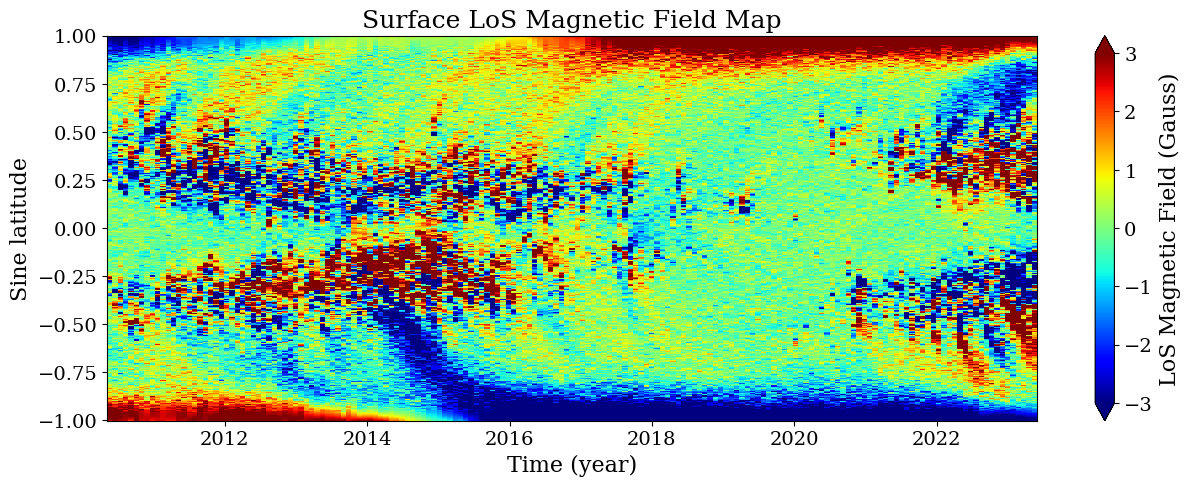

In [143]:
theta,t = np.meshgrid(th, rot2date)
fig, ax = plt.subplots(figsize=(15,5))
plt.title('Surface LoS Magnetic Field Map', fontsize = 18) 
plt.pcolormesh(t, theta, phiaverage, cmap='jet', vmax = 3, vmin=-3)
plt.colorbar(extend='both', label='LoS Magnetic Field (Gauss)')
plt.xlabel('Time (year)', fontsize=16)
plt.ylabel('Sine latitude', fontsize=16)
plt.savefig('bfly.png',format='png', dpi=300, bbox_inches='tight',pad_inches = 0.2)